# Drawing graphs with Python

In [1]:
%pip install -q pandas
%pip install -q numpy
%pip install -q matplotlib

import pandas
import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Loading data

The first step is to load the data in. We saved it as a CSV file in the last notebook, so this is straightforwards thanks to pandas. The `head()` method shows us the first few rows of the data, giving us a chance to check we loaded the right file and it loaded correctly.

In [2]:
ship_data = pandas.read_csv('ship_data.csv', sep=',', header=0)

print(ship_data.head())

   Unnamed: 0    ship        id   title   startDate     endDate description  \
0           0  Acasta  C1496956  ACASTA  1918-09-01  1918-10-31     ACASTA.   
1           1  Acasta  C1496944  ACASTA  1915-02-08  1915-04-09     ACASTA.   
2           2  Acasta  C1496952  ACASTA  1917-11-01  1918-02-02     ACASTA.   
3           3  Acasta  C1496951  ACASTA  1917-05-01  1917-07-01     ACASTA.   
4           4  Acasta  C1480967  ACASTA  1913-08-01  1913-09-30     ACASTA.   

  reference record_duration ship_colour  ship_number record_series_colour  \
0    ADM 53         60 days          C0            0                   C0   
1    ADM 53         60 days          C0            0                   C0   
2    ADM 53         93 days          C0            0                   C0   
3    ADM 53         61 days          C0            0                   C0   
4    ADM 53         60 days          C0            0                   C0   

   description_length  
0                   7  
1             

While CSV is a useful format for transporting data around, it does not save metadata such as the data format of each column. So, for convenience when drawing the graphs, we are going to add this data back in. These metadata can be added for any coloumn; here we only need to ensure the date columns are formatted correctly. When we re-print the head of the data, we should see that it looks the same. 

In [3]:
ship_data['startDate'] = pandas.to_datetime(ship_data['startDate'])
ship_data['endDate'] = pandas.to_datetime(ship_data['endDate'])
ship_data['record_duration'] = ship_data['endDate'] - ship_data['startDate']

print(ship_data.head())

   Unnamed: 0    ship        id   title  startDate    endDate description  \
0           0  Acasta  C1496956  ACASTA 1918-09-01 1918-10-31     ACASTA.   
1           1  Acasta  C1496944  ACASTA 1915-02-08 1915-04-09     ACASTA.   
2           2  Acasta  C1496952  ACASTA 1917-11-01 1918-02-02     ACASTA.   
3           3  Acasta  C1496951  ACASTA 1917-05-01 1917-07-01     ACASTA.   
4           4  Acasta  C1480967  ACASTA 1913-08-01 1913-09-30     ACASTA.   

  reference record_duration ship_colour  ship_number record_series_colour  \
0    ADM 53         60 days          C0            0                   C0   
1    ADM 53         60 days          C0            0                   C0   
2    ADM 53         93 days          C0            0                   C0   
3    ADM 53         61 days          C0            0                   C0   
4    ADM 53         60 days          C0            0                   C0   

   description_length  
0                   7  
1                   7  
2 

## Drawing graphs

### Bar charts/graphing chronological data

For the first set of graphs, we are going to draw a graph showing record start and end dates. This can highlight things such as "hot spots" where a lot of records were created in a short period of time, unusual records such as ones with a particularly long chronological range, or gaps where there are no records. 

We are going to use the [`matplotlib`](https://matplotlib.org/stable/) library to draw the graphs. This is a powerful library, and can be used simply, or with high levels of customisation. Lets start with seeing how a simple graph looks.

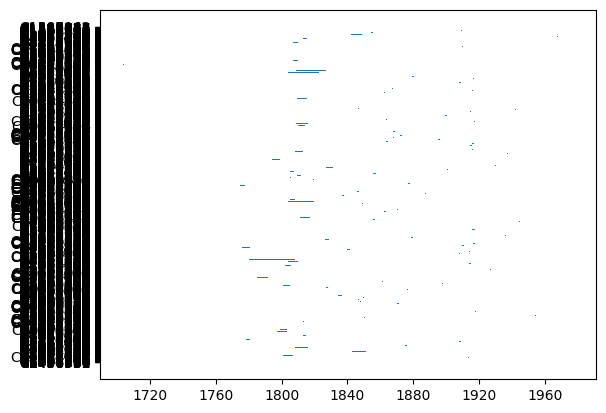

In [4]:
fig_starter, ax_starter = plt.subplots()

# In this line, we specify that its a horizontal bar chart by using barh, then the y and x-axes, then where we want the bars to start with the left parameter. 
ax_starter.barh(ship_data['id'], ship_data['record_duration'], left=ship_data['startDate'], height=0.5)

plt.show()

This first attempt worked, and we have made a graph. It is, however, quite hard to read as there are a lot of records. Lets look at two different ways to improve this: aggregating records to plot records for the same ship on the same line; and one plotting records individually, but limiting the number of ships. For both graphs, we are also going to increase the size of the graph and colour the bars to make the graph easier to read. 

This comparison will help show how small variations can affect similar visualisations. As an example, a single record covering a long period of time will show up as a long bar in both graphs. In the graph with records aggregated by ship this long bar will overlap and hide additional records that cover sub-sets of the same time period, but the graph will be easier to read. When graphing individual records, however, we are going to limit it to the first 10 ships, but still see all records for each ship. 

To aggregate by ship, the main change we need to make is moving from record ids on the y axis to the ship names. The size change and colouring is achieved by adding some extra parameters where appropriate, and the axis labels and legend are added by calling the appropriate methods.

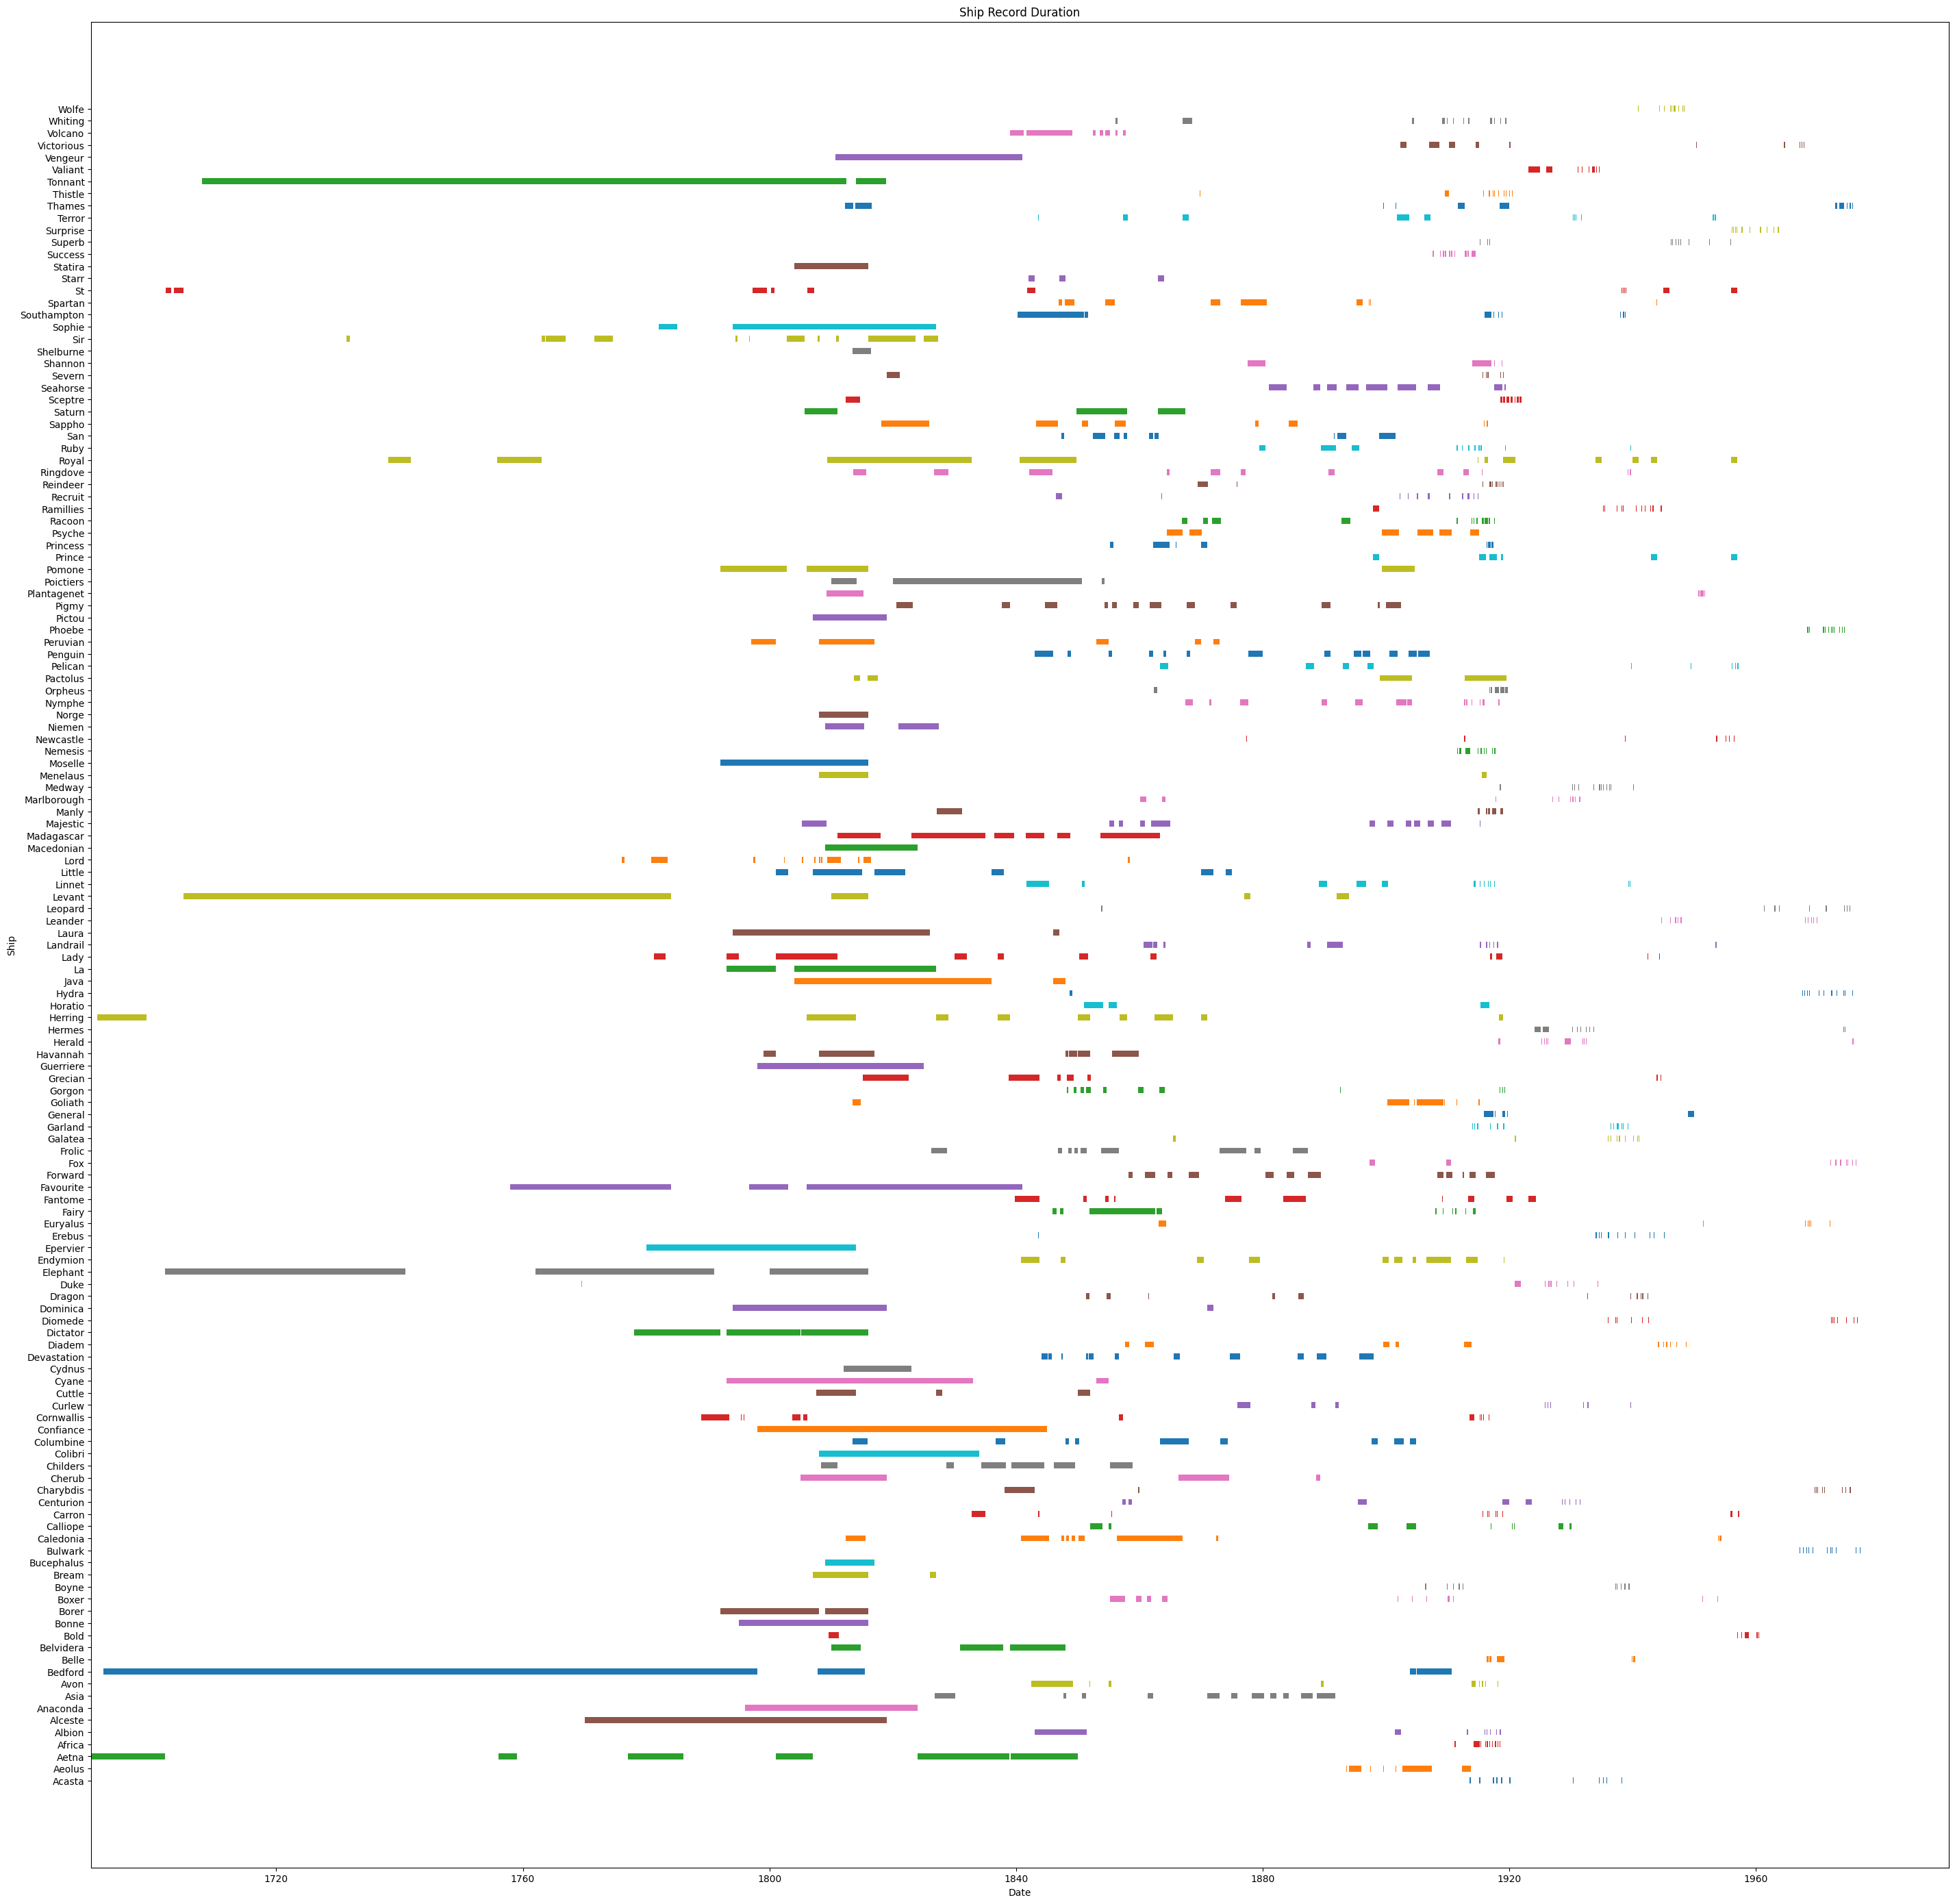

In [5]:
fig_bar_by_ships, ax_bar_by_ships = plt.subplots(figsize=(35, 35))

ax_bar_by_ships.barh(ship_data['ship'], ship_data['record_duration'], left=ship_data['startDate'], color=ship_data['ship_colour'], height=0.5)

ax_bar_by_ships.set_xlabel('Date')
ax_bar_by_ships.set_ylabel('Ship')
ax_bar_by_ships.set_title('Ship Record Duration')

plt.show()

For the alternate graph, we need to restrict the data. This is why we added the ship number column in the previous notebook - it lets us easily isolate the first 10 ships. We are also going to adjust the font size of lables and titles to make them easier to read, and add faint grid lines. Font size can be specified by both numbers and words such as "large" or "x-large"; setting the right font size is a matter of trial and error, and relates to the size specified in the subplot call. For the rest of the graphs in this notebook, we are going to leave the fonts at the default settings, but you can adjust them if you wish.

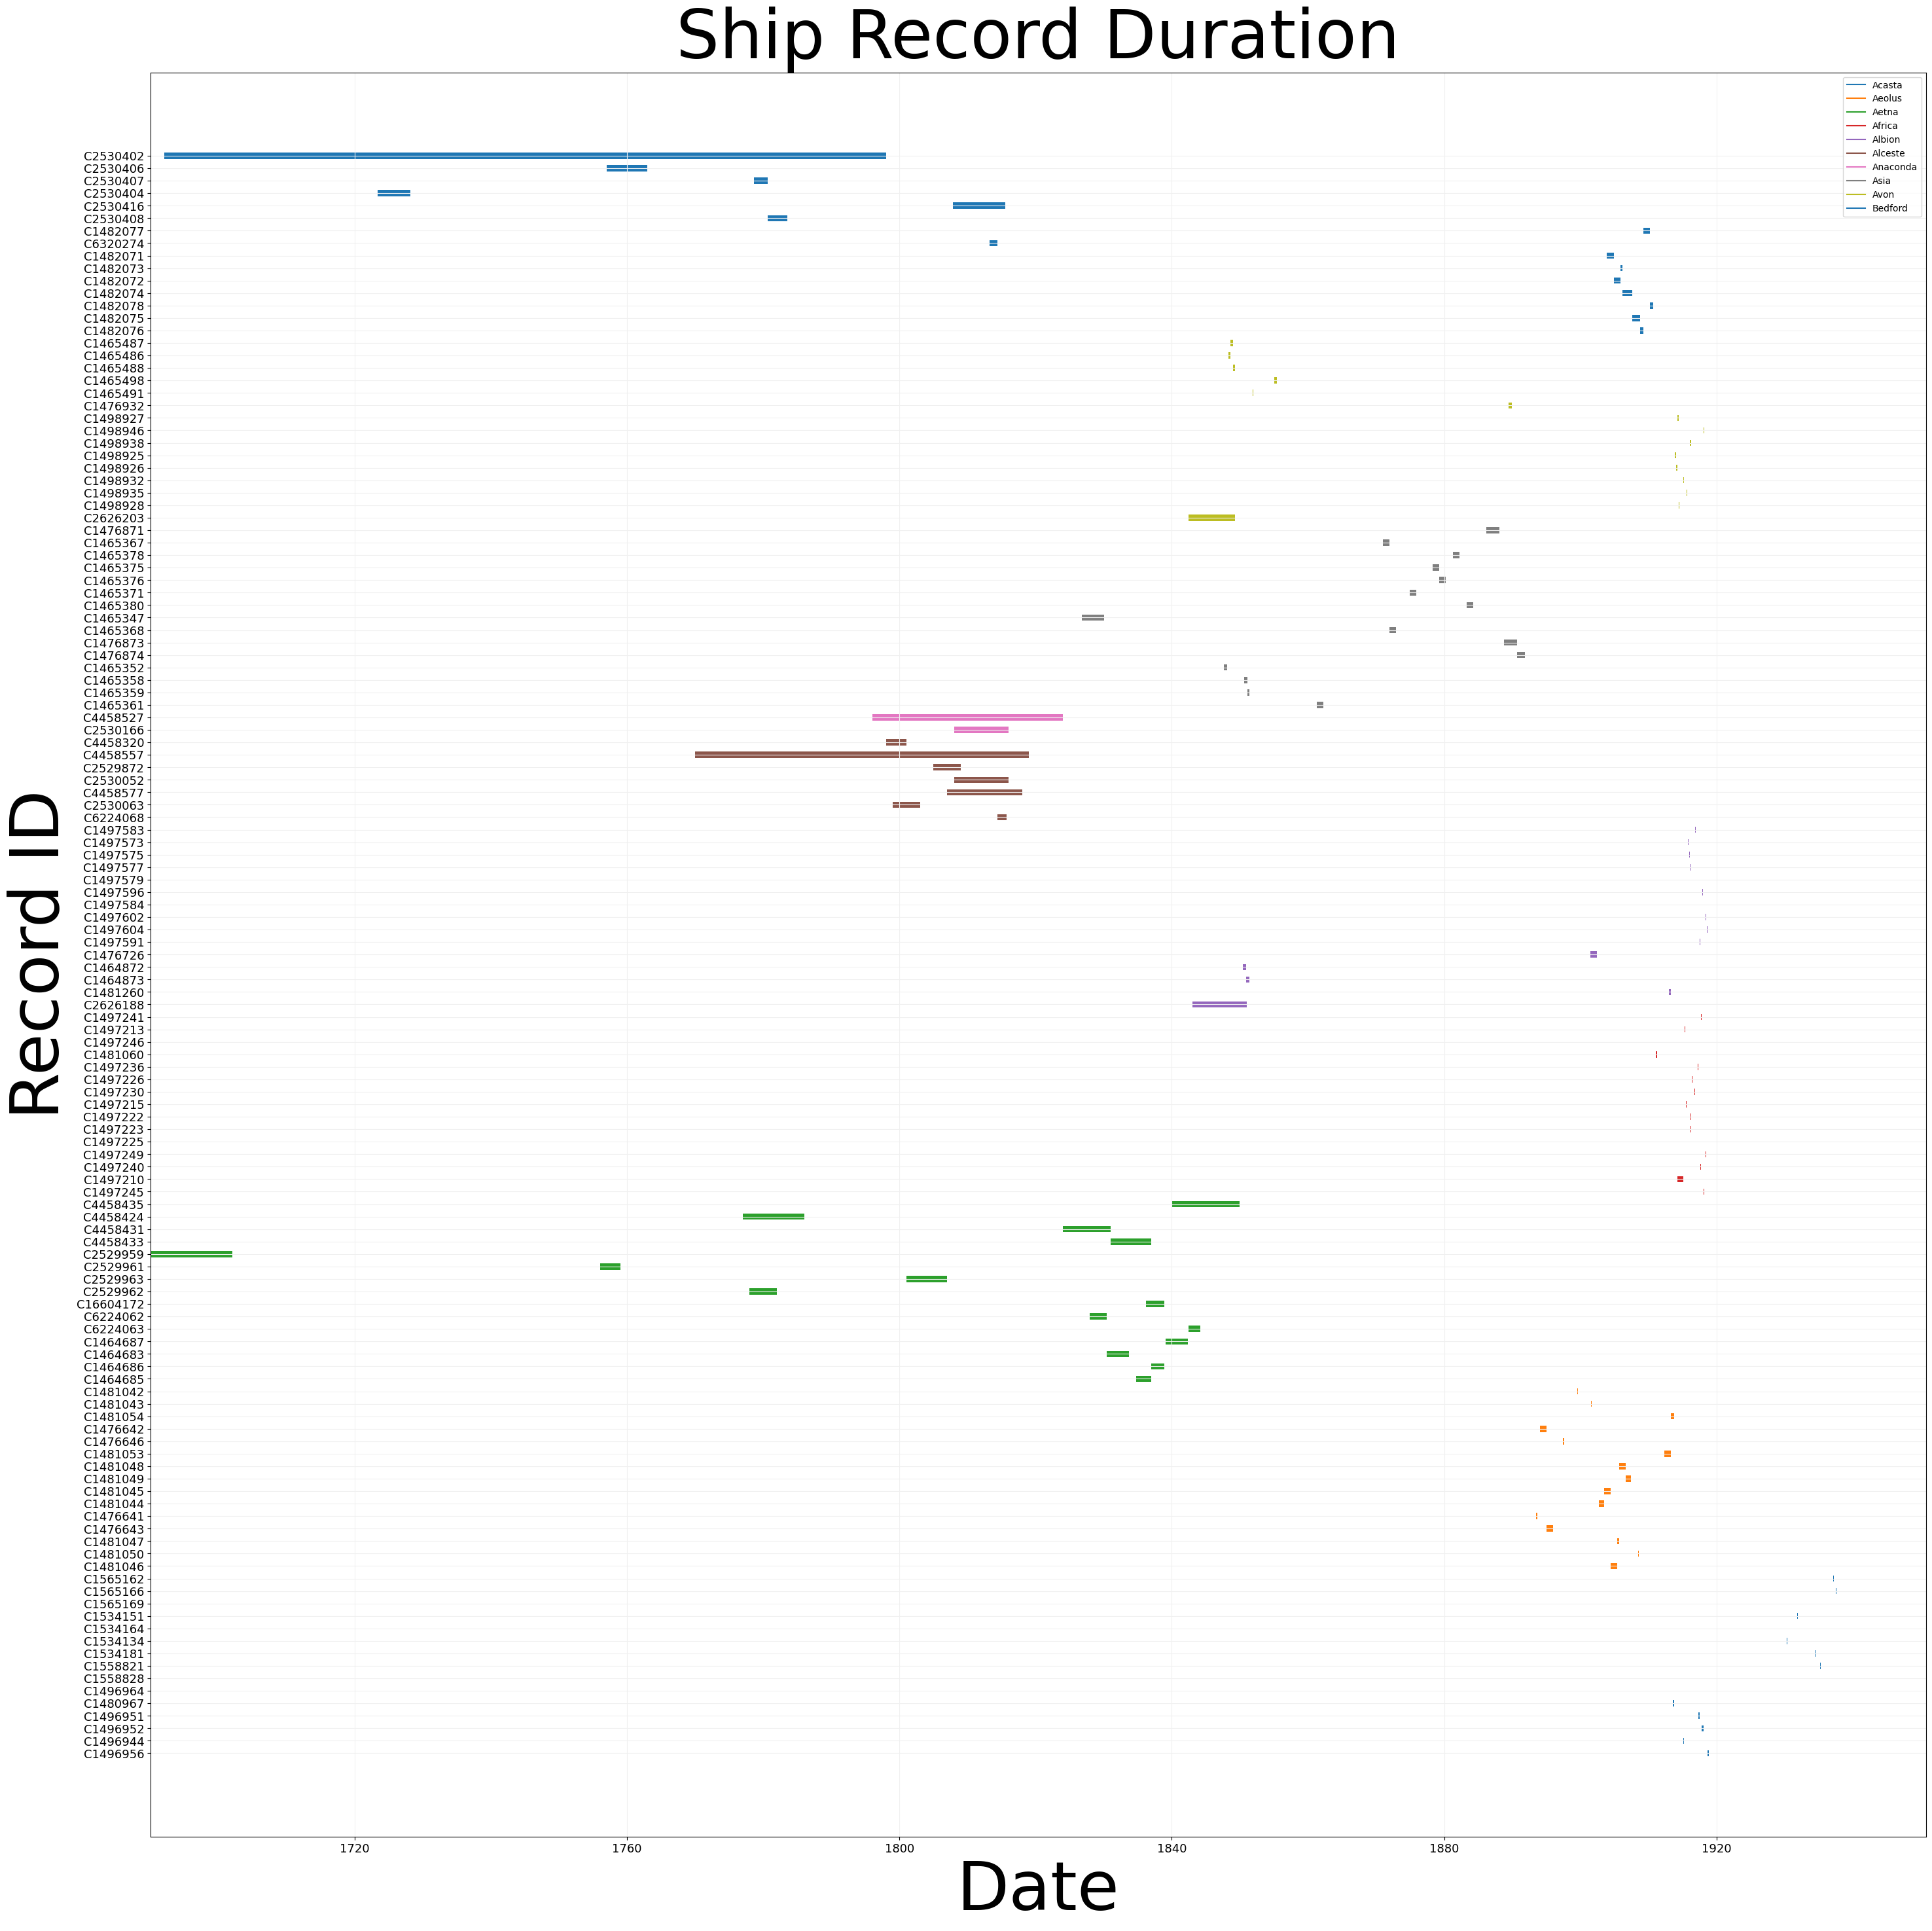

In [6]:
ship_data_first_10 = ship_data[ship_data['ship_number'] < 11]

fig_bar_by_ships_first_10, ax_bar_by_ships_first_10 = plt.subplots(figsize=(35, 35))

ax_bar_by_ships_first_10.barh(ship_data_first_10['id'], ship_data_first_10['record_duration'], left=ship_data_first_10['startDate'], color=ship_data_first_10['ship_colour'], height=0.5)

ax_bar_by_ships_first_10.grid(which='major', color='#F0F0F0', linestyle='-')

ax_bar_by_ships_first_10.set_xlabel('Date', fontsize="75")
ax_bar_by_ships_first_10.set_ylabel('Record ID', fontsize="75")
ax_bar_by_ships_first_10.set_title('Ship Record Duration', fontsize="75")

plt.tick_params(labelsize="13", axis="both")

for record in ship_data_first_10['ship'].unique():
    ax_bar_by_ships_first_10.plot([], [], color=ship_data_first_10[ship_data_first_10['ship'] == record]['ship_colour'].iloc[0], label=record)

ax_bar_by_ships_first_10.legend()

plt.show()

With these two graphs, we can see that the concern about chronologically long records overlapping and hiding shorter records has occurred - record C2530402 for the ship "Bedford" completely overlaps several others. These other records are visible on the graph with the individual records. However, the graph with data aggregated by ship is easier to read and provides more data - there are a lot more records plotted on a single graph. 
This compromise between the two graphs highlights the importance of understanding both your data, and limitations of the graphing techniques you are using. The research question and publication location will influence which side of the compromise you choose.

There is another interesting feature we can see on these graphs. The Royal Navy re-use names frequently, and we can see this in the graphs as clusters of records. For example, in the last graph, we can clearly see two clusters for "Bedford" - one from 1700 to about 1800, and a second more tightly clustered around 1900. Nicely, this ties in with the different HMS's Bedford - the first cluster likely covers both the [1698 ship](https://en.wikipedia.org/wiki/HMS_Bedford_(1698)) and the [1775 one](https://en.wikipedia.org/wiki/HMS_Bedford_(1775)); the first was launched at the start of the cluster, then the later was launched around the time the first was sold for scrap, and was sold for scrap itself roughly when the cluster ends. The second cluster then maps to the [1901 ship](https://en.wikipedia.org/wiki/HMS_Bedford_(1901)), which was wrecked in 1910, resulting in the chronologically shorter cluster of records. The next notebook, focusing more on [statistics](./3-doing-stats.ipynb) will explore this further, and show how we can use the data to explore these clusters in more detail.

## Scatter plots/record description length

The next graphs we are going to draw will look at the length of record descriptions. For these graphs, we want the y-axis to be the length of the description, and the x-axis dependant on the graph. The aim is going to be to see if there is a relationship between the length of the description and the era of the record.

As with the bar charts, we are going to start with the basic scatter graph. If your data is straight-forwards-enough, this may be all you need to show your data. Given the complexity of our data, this is unlikely to be the case for us, but worth starting with.

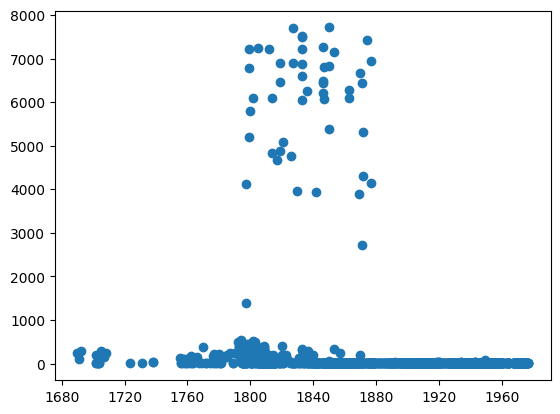

In [7]:
fig_basic_scatter, ax_basic_scatter = plt.subplots()

ax_basic_scatter.scatter(ship_data['startDate'], ship_data['description_length'])

plt.show()

From this, we can see that there is clearly something interesting going on - there is a big peak over the 1800s. However, there is not enough information presented in the graph to really see what's going on. The graph is too small, just like the bar charts, and a lot of the points are squashed together on 0 length, when there may be some variation there. More importantly, we have minimal information about what the points on the plot represent. As before, we can do some tweaks to help with this, and see how varying the graph highlights different aspects of the data.

For the first improved graph, we are going to do the same set of tweaks as before - increase the size, add colour, and add labels. Those steps alone typically make a graph much easier to read. A typical addition to scatter graphs is a line of best fit, showing the general trend of the data in the graph. In this case, we are going to avoid it at this stage - without understanding the large peak in the 1800s, this may be misleading. In this first case, we are also going to avoid adding the legend for now - we would need to make it fit for every ship, and its worth seeing how the graph looks first, before adding it.

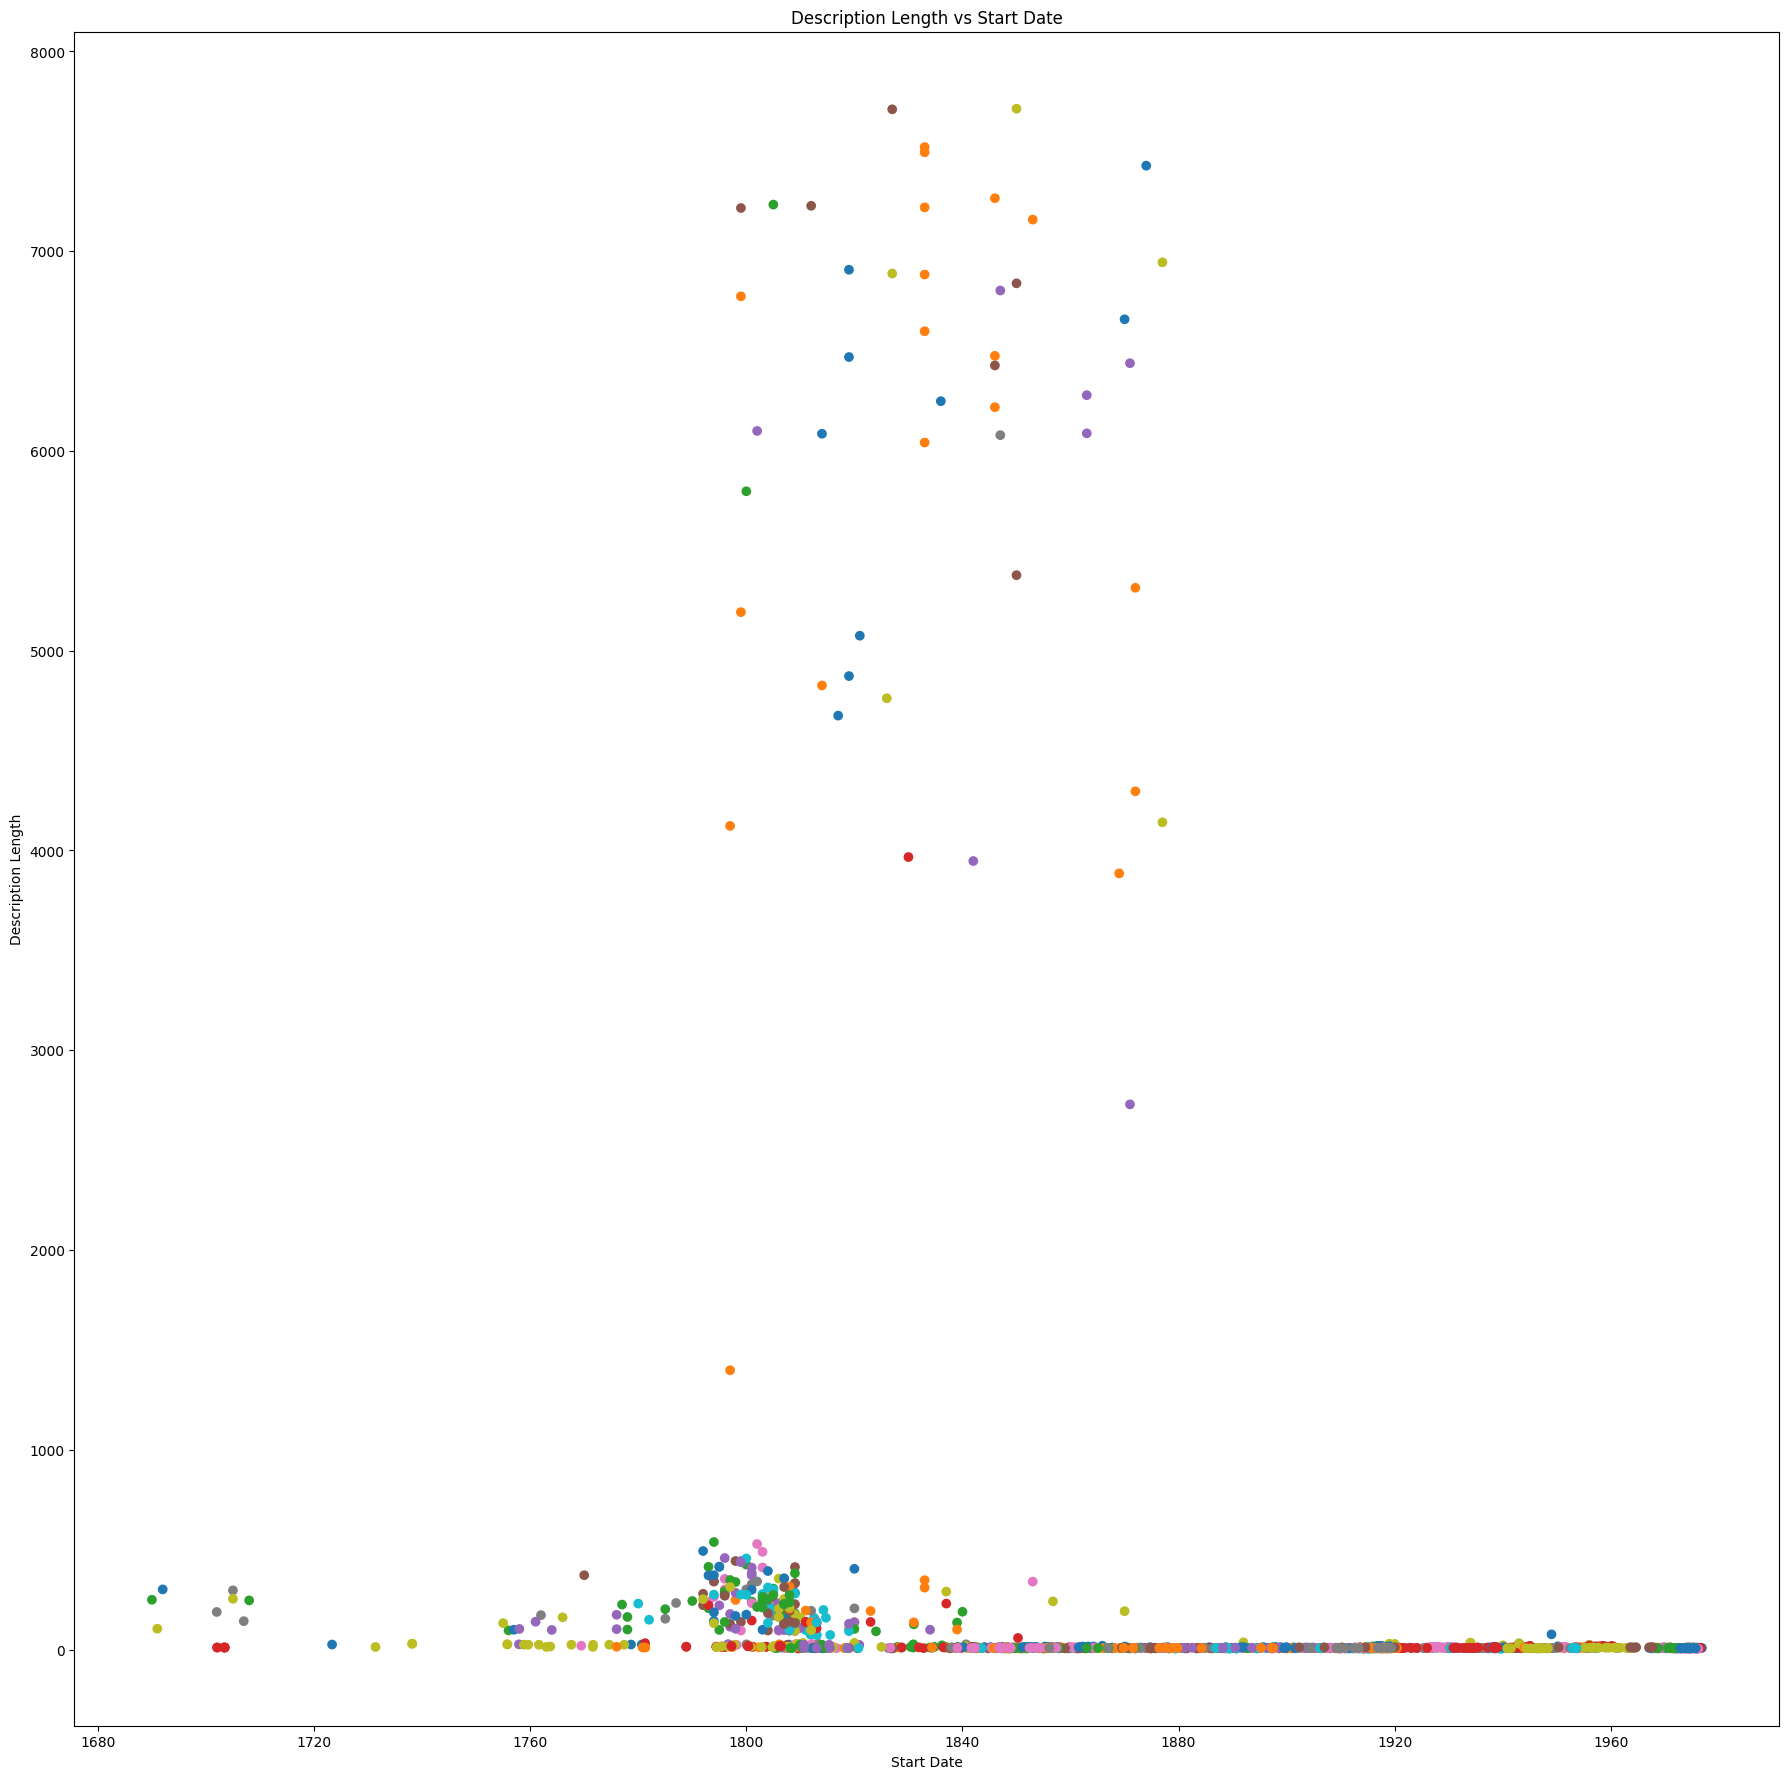

In [8]:
fig_improved_scatter, ax_improved_scatter = plt.subplots(figsize = (22, 22))

ax_improved_scatter.scatter(ship_data['startDate'], ship_data['description_length'], c=ship_data['ship_colour'])

ax_improved_scatter.set_xlabel('Start Date')
ax_improved_scatter.set_ylabel('Description Length')
ax_improved_scatter.set_title('Description Length vs Start Date')

plt.show()

From this new graph, we can see details of the graph with greater confidence. We can see, for example, that post approx. 1830, all record descriptions really are near 0 in length. We can see much greater detail about 1800's peak, including a secondary peak more closely clustered around 1800. This specific peak is likely a result of the various [Nepolianic wars](https://en.wikipedia.org/wiki/Napoleonic_Wars), which the Royal Navy was heavily involved in - thus, there are many records from that period available at the National Archives. Its also clear that ships and records are spread throughout the period, and ship name does not explain the main 1800s peak.

Lets try a slight variation, colouring by record series. As we have fewer series, we will be able to include the legend. 

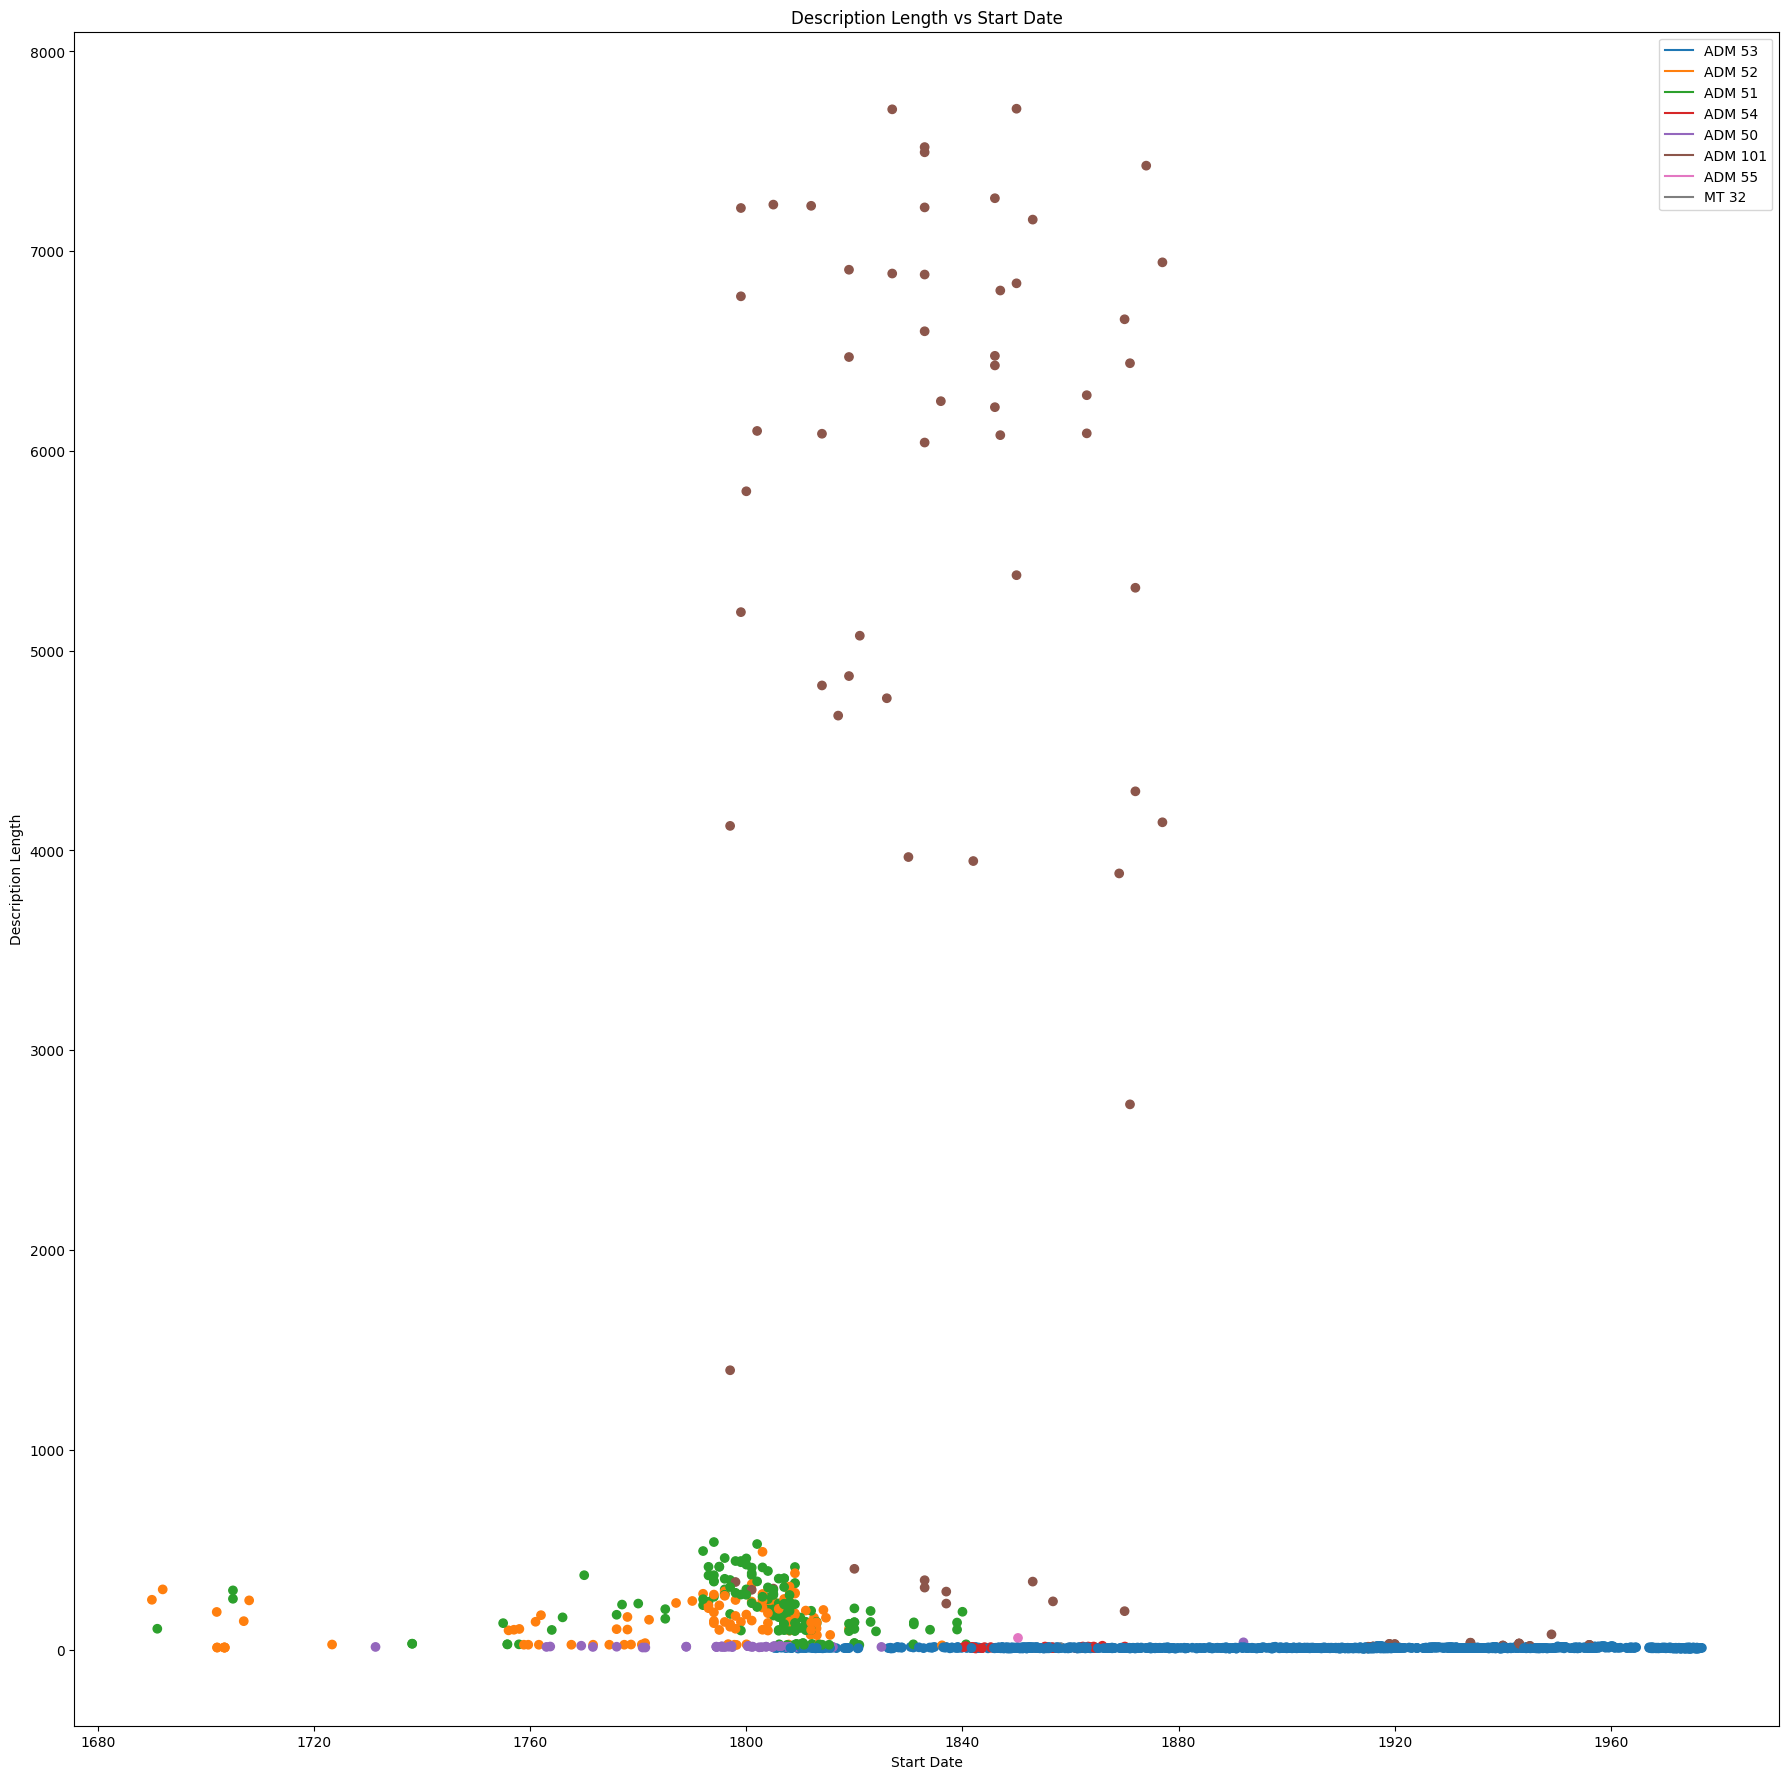

In [9]:
fig_improved_scatter_series, ax_improved_scatter_series = plt.subplots(figsize = (22, 22))

ax_improved_scatter_series.scatter(ship_data['startDate'], ship_data['description_length'], c=ship_data['record_series_colour'])

ax_improved_scatter_series.set_xlabel('Start Date')
ax_improved_scatter_series.set_ylabel('Description Length')
ax_improved_scatter_series.set_title('Description Length vs Start Date')

for record in ship_data['reference'].unique():
    ax_improved_scatter_series.plot([], [], color=ship_data[ship_data['reference'] == record]['record_series_colour'].iloc[0], label=record)

ax_improved_scatter_series.legend()

plt.show()

And now we can see that the peak is caused by a single series - ADM-101. When we then dig into ADM-101 on discovery we can see that ADM-101 is a series of medical records, recording names and details of patients of ships at sea, with the record description providing detail about every folio [(see here, for example)](https://discovery.nationalarchives.gov.uk/browse/r/r/C10488311). Interestingly, this peak covers approximately 1800 to 1880, despite the covering dates of the series being [1785-1963](https://discovery.nationalarchives.gov.uk/details/r/C1810). This indicates something changed in the 1880s, and records after this date are different to those before.

From the previous bar graphs, we know that older records are more likely to cover longer periods of time. Given that we are exploring the relationship between record length and time, lets try a different graph to see if records covering a longer period have longer descriptions. To graph this, all we need to do is change the x-axis from start date to record duration.

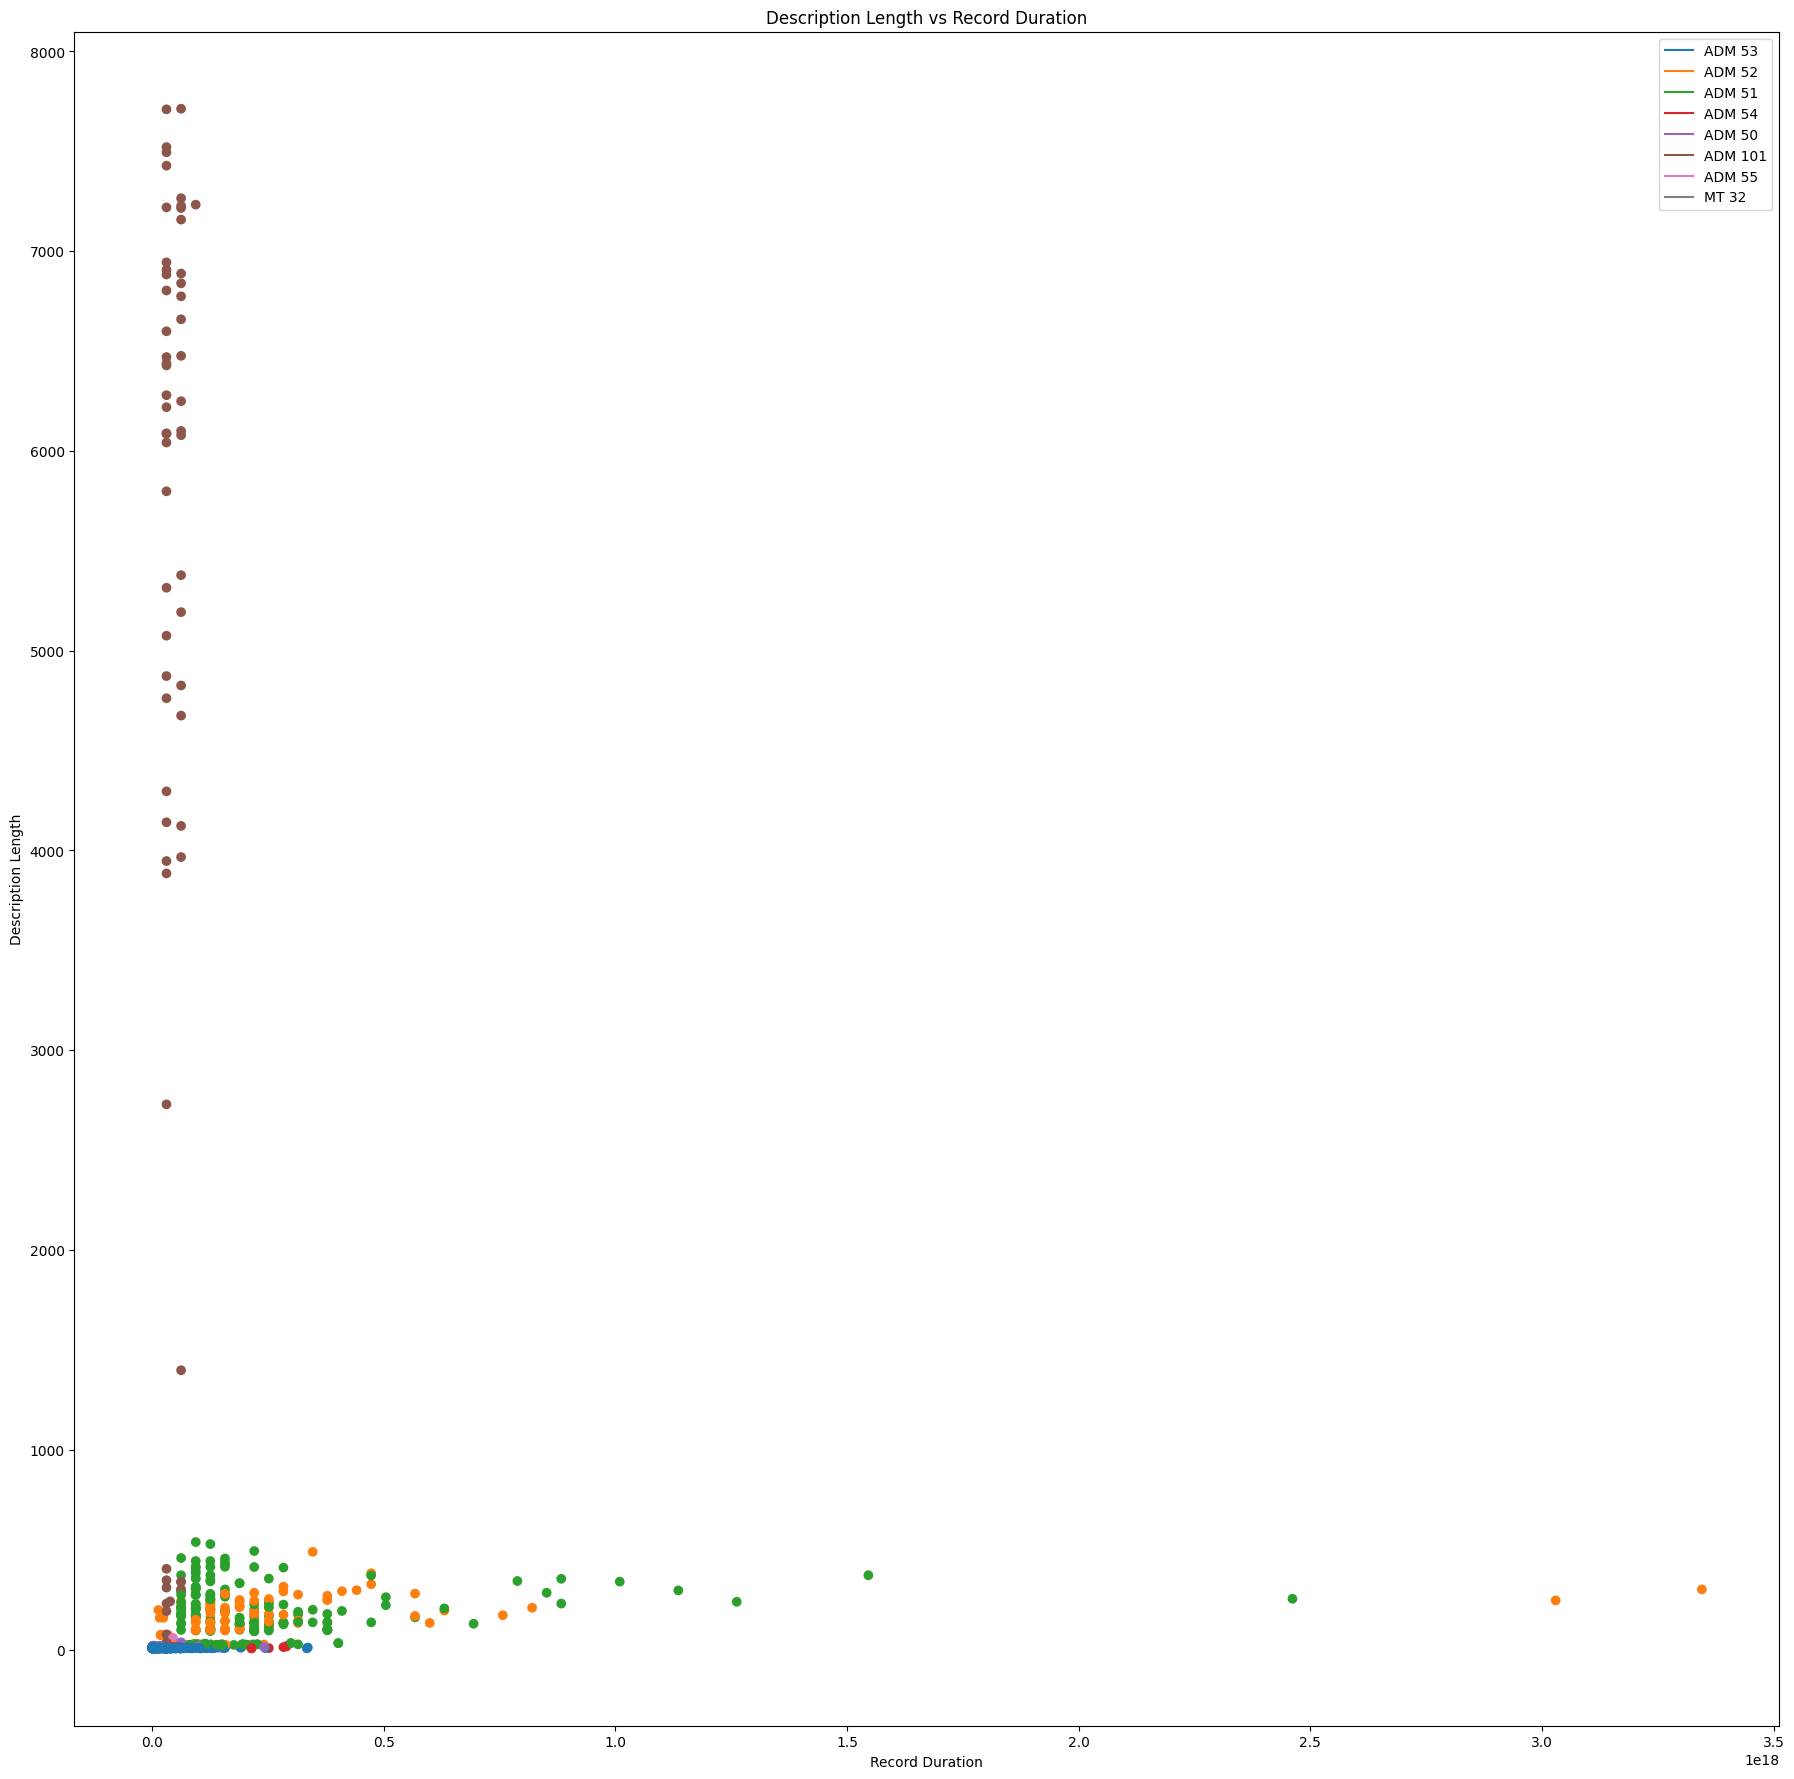

In [10]:
fig_duraction_scatter, ax_duraction_scatter = plt.subplots(figsize = (22, 22))

ax_duraction_scatter.scatter(ship_data['record_duration'], ship_data['description_length'], c=ship_data['record_series_colour'])

ax_duraction_scatter.set_xlabel('Record Duration')
ax_duraction_scatter.set_ylabel('Description Length')
ax_duraction_scatter.set_title('Description Length vs Record Duration')

for record in ship_data['reference'].unique():
    ax_duraction_scatter.plot([], [], color=ship_data[ship_data['reference'] == record]['record_series_colour'].iloc[0], label=record)

ax_duraction_scatter.legend()

plt.show()

This new graph again shows the ADM-101 peak, which helpfully confirms we have plotted the correct data. The main thing this new graph shows is that record duration has very little effect on the length of the description, with two main indicators. First, all ADM-101 records have a very short duration but long descriptions, while there are other records that cover longer time periods but currently have short descriptions. Secondly, if you discount the ADM-101 series, as records cover a longer period of time, the general length of the description does not change - suggesting that the length of the description is not related to the length of the record.

There is a cluster in this data again, with most records having both a short duration and short description. This is likely just an aspect that would require some work to confirm, but may be simply explained by most records being short, related to day-to-day activities. 

## Drawing multiple graphs side-by-side

A useful feature of matplotlib is the ability to draw multiple graphs side-by-side. This provides an opportunity to draw two different views of the same data side by side for comparison, or draw multiple graphs of more complex data (such as multiple columns from a data set) in a single larger figure. Here we are going to demonstrate the first use case, drawing the two scatter graphs we just drew side by side.

The documentation for multiple subplots is [available here](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html). The main requirements are to label your subplots, and define where they are to be placed in the `plt.subplots()` call.

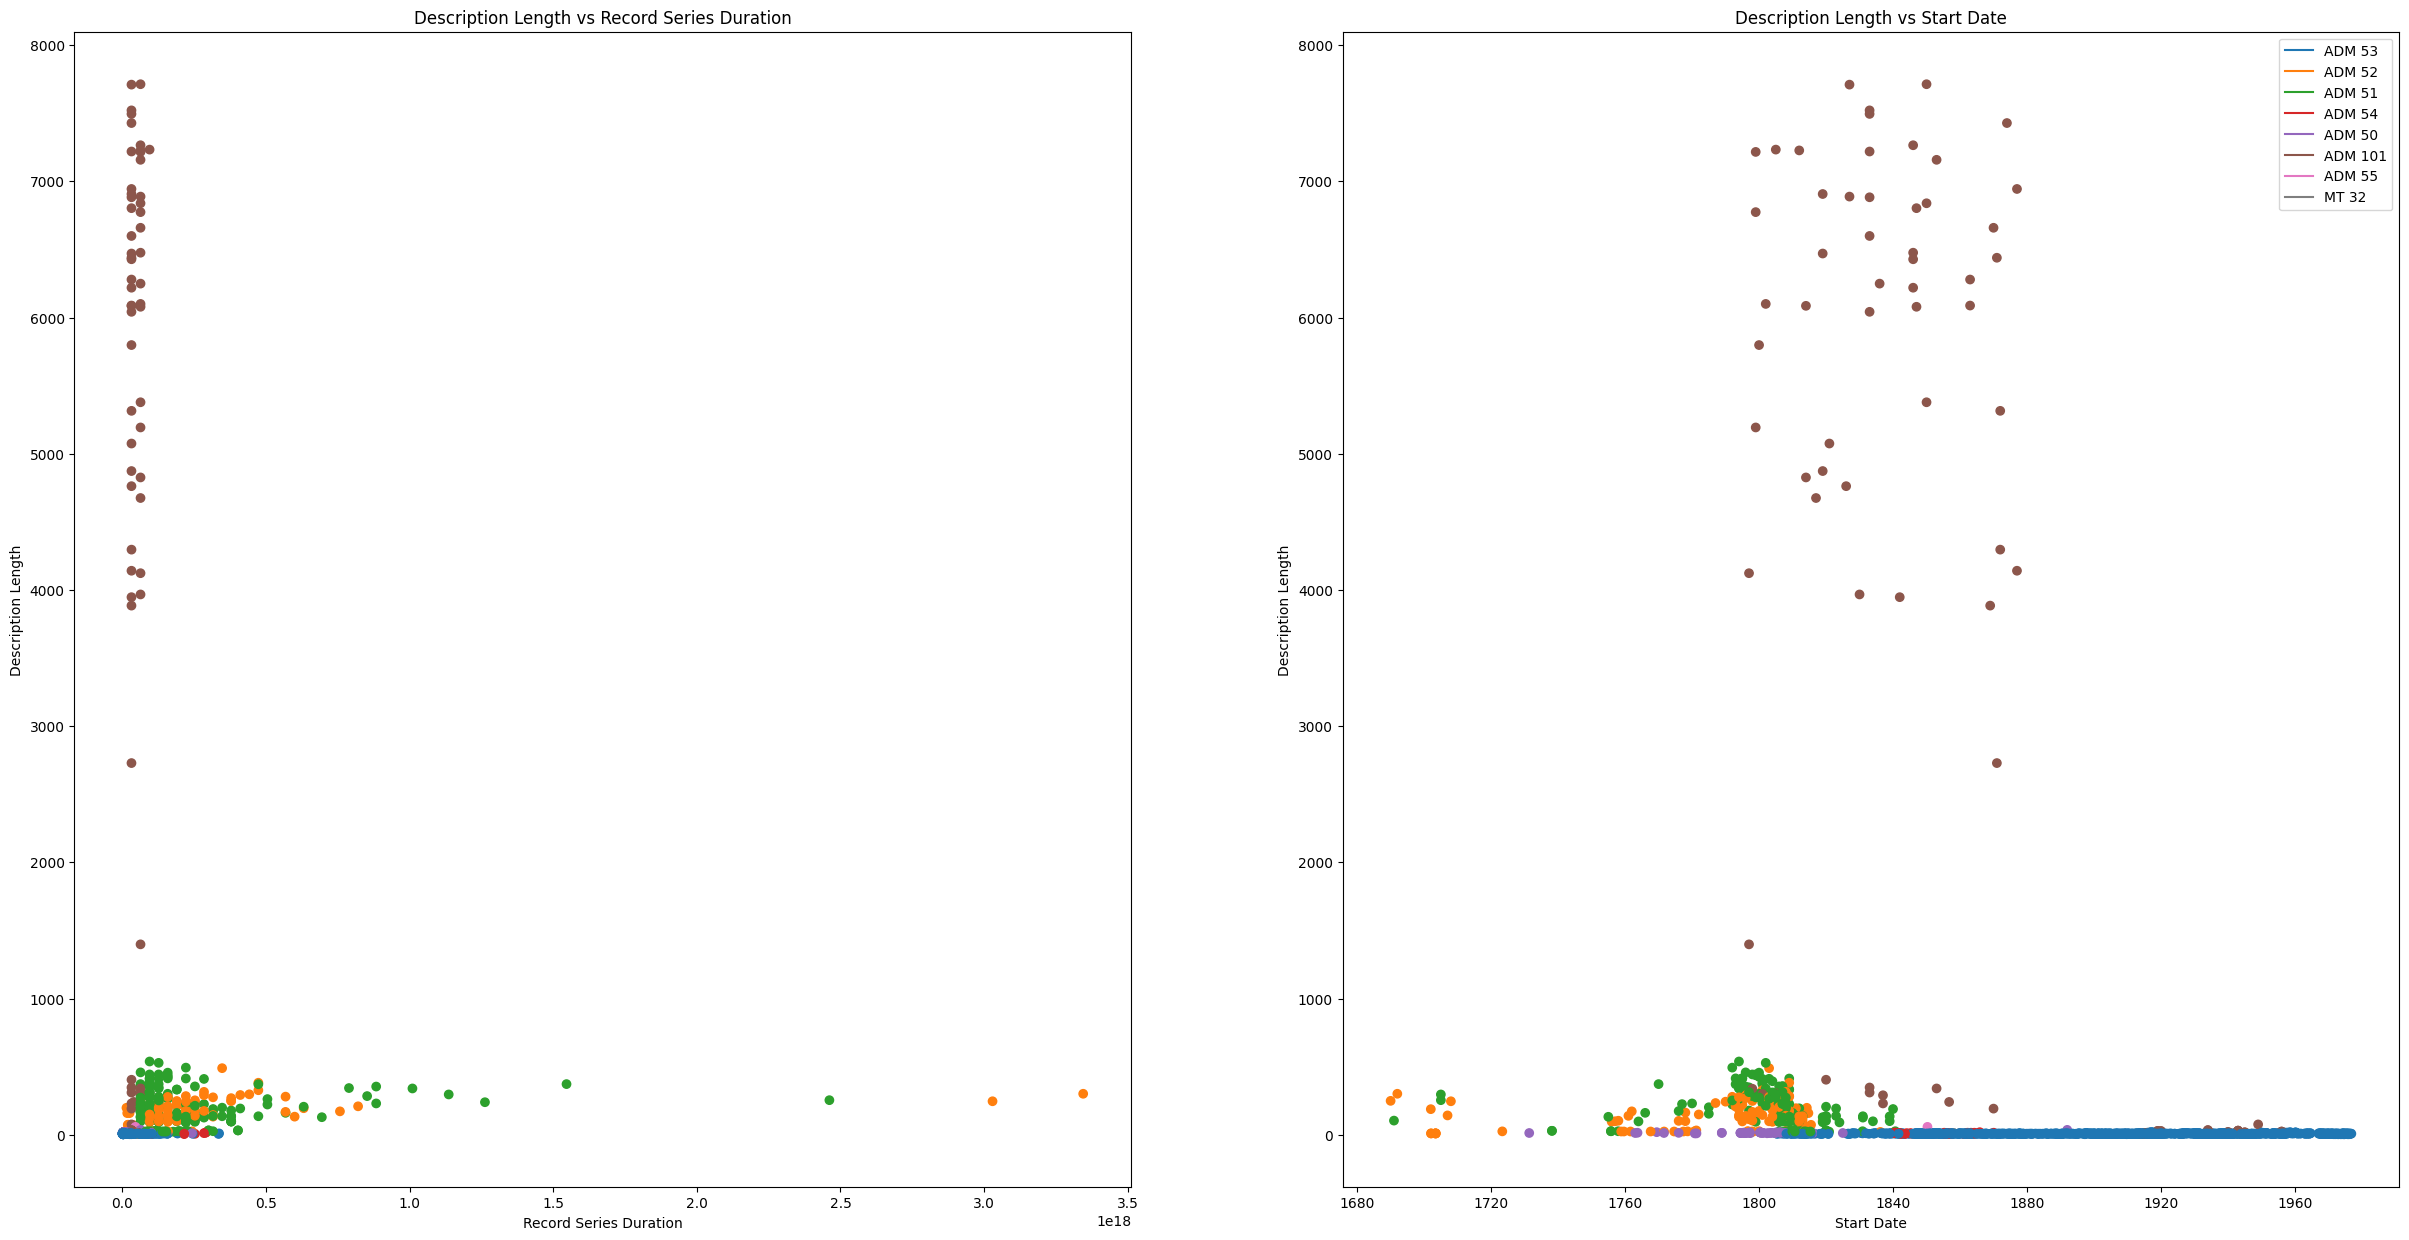

In [11]:
                # two subplots with labels                     # 1 row, 2 columns, then the figure size
fig_scatter_2, (ax_scatter_2_1, ax_scatter_2_2) = plt.subplots(1, 2, figsize = (30, 15))

ax_scatter_2_1.scatter(ship_data["record_duration"], ship_data["description_length"], color=ship_data["record_series_colour"])

ax_scatter_2_1.set_xlabel('Record Series Duration')
ax_scatter_2_1.set_ylabel('Description Length')
ax_scatter_2_1.set_title('Description Length vs Record Series Duration')

ax_scatter_2_2.scatter(ship_data["startDate"], ship_data["description_length"], color=ship_data["record_series_colour"])

ax_scatter_2_2.set_xlabel('Start Date')
ax_scatter_2_2.set_ylabel('Description Length')
ax_scatter_2_2.set_title('Description Length vs Start Date')

for record in ship_data['reference'].unique():
    ax_scatter_2_2.plot([], [], color=ship_data[ship_data['reference'] == record]['record_series_colour'].iloc[0], label=record)

ax_scatter_2_2.legend()

plt.show()